# Initialization

Connect to Google Drive:

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages (may need to add more):

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, y_train, y_test = load_processed_data()

%matplotlib inline

**DEVELOPER'S NOTE: k-NN code will be the anchor code for implementing other models. Please refer to this code as a guide when you work on other classes of models. Please refer to SleepyHunter if you ever need any more preset functions, as well as when you find a bug. Regards.**

# Basic training

We define the model and train it first

In [13]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train_bow, y_train)

KNeighborsClassifier(n_neighbors=3)

Getting prediction on training set (without cross validation) then evaluate it!

Score of on train are:
	- Accuracy score: 0.86
	- Micro F1 score: 0.86
	- Macro F1 score: 0.84
Score of on test are:
	- Accuracy score: 0.71
	- Micro F1 score: 0.71
	- Macro F1 score: 0.67


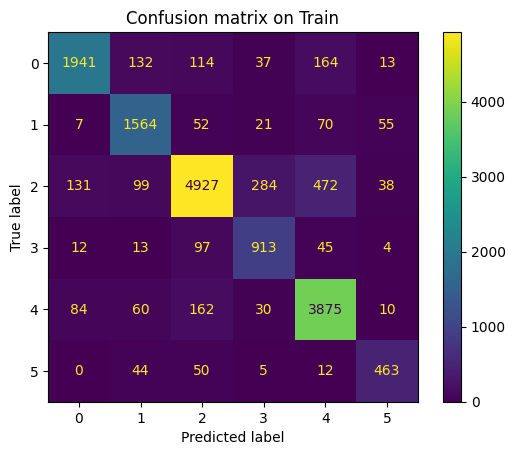

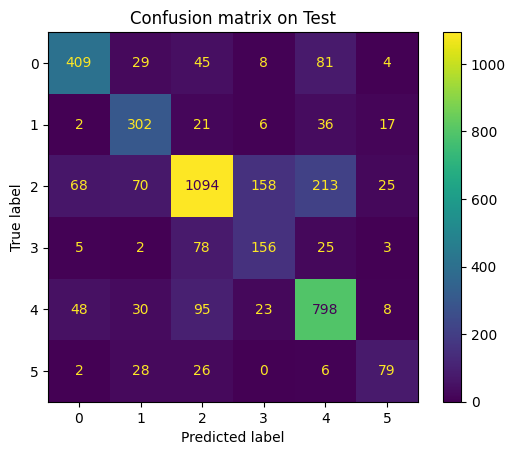

In [14]:
evaluate_model(knn_model, X_train_bow, X_test_bow, y_train, y_test, include_training = True)

Learning curve

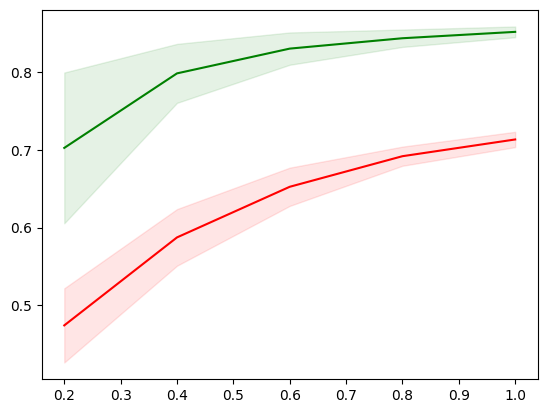

In [15]:
draw_learning_curve(knn_model, X_train_bow, y_train)

Actually I set k = 3 to beautify the record, I ran k >= 5 and it was terrible.
Now we draw the plot for a range of k-neighbors

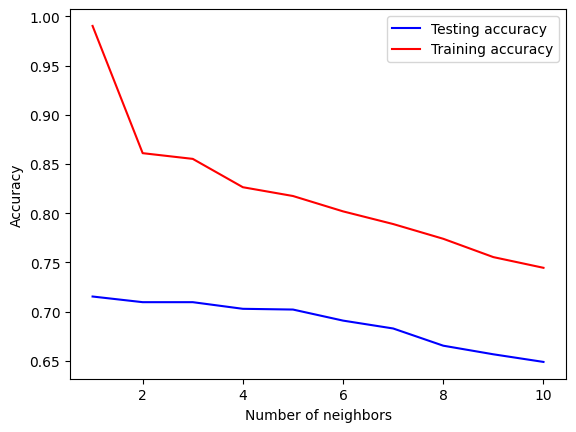

In [16]:
# Setting the hyperparameter range
K = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
accuracy_list = list()
valid_accuracy_list = list()

for k in K:
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_train_bow, y_train)

  data_pred_y = knn_model.predict(X_test_bow)
  data_valid_y = knn_model.predict(X_train_bow)

  accuracy_list.append([k, accuracy_score(y_test, data_pred_y)])
  valid_accuracy_list.append([k, accuracy_score(y_train, data_valid_y)])

accuracy_list = np.asarray(accuracy_list)
valid_accuracy_list = np.asarray(valid_accuracy_list)

plt.plot(accuracy_list[:, 0], accuracy_list[:, 1], label = "Testing accuracy", color = 'b')
plt.plot(valid_accuracy_list[:, 0], valid_accuracy_list[:, 1], label = "Training accuracy", color = 'r')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Using GridSearchCV to make a total search

In [17]:
dict_param = {'n_neighbors': np.arange(1, 11)}
best_knn_model = GridSearchCV(KNeighborsClassifier(), param_grid = dict_param, n_jobs = -1, cv = 10, scoring = 'accuracy')

best_knn_model.fit(X_train_bow, y_train)

print("Best parameters for k_NN:", best_knn_model.best_params_)
data_best_knn_pred_y = best_knn_model.predict(X_test_bow)
print("Accuracy of that model:", accuracy_score(data_best_knn_pred_y, y_test))


Best parameters for k_NN: {'n_neighbors': 1}
Accuracy of that model: 0.71525


I'm going to do just literally the same thing for TfIdf dataset... later.

# Export models

In [18]:
directory = "data/models/"

dump(best_knn_model, directory + "best_knn_model.joblib")

['data/models/best_knn_model.joblib']